In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Cargar los datos desde un archivo CSV
data1 = pd.read_csv('/content/estimaciones-agricolas-2020-08.csv')

In [ ]:
print(data1)

In [8]:
print(data1.head())

   id_provincia     provincia  id_departamento            departamento  \
0             6  Buenos Aires              854              25 de Mayo   
1             6  Buenos Aires              854              25 de Mayo   
2             6  Buenos Aires               14  Adolfo Gonzales Chaves   
3             6  Buenos Aires               14  Adolfo Gonzales Chaves   
4             6  Buenos Aires               14  Adolfo Gonzales Chaves   

   id_cultivo cultivo  id_campa�a    campa�a  sup_sembrada  sup_cosechada  \
0           1     Ajo           1  1969/1970             3              3   
1           1     Ajo           2  1970/1971             1              1   
2           1     Ajo           1  1969/1970            15             15   
3           1     Ajo           2  1970/1971            10             10   
4           1     Ajo           3  1971/1972             8              8   

   produccion   rendimiento  
0           10         3333  
1            3         3000  
2 

In [19]:
# Filtrar las filas donde la columna "cultivo" contiene "Arroz"
arroz_data = data1[data1['cultivo'].str.contains('Arroz', case=False)]

# Mostrar los datos de cultivo de arroz
print(arroz_data)


       id_provincia provincia  id_departamento     departamento  id_cultivo  \
10142            22     Chaco              126        1 de Mayo           4   
10143            22     Chaco              126        1 de Mayo           4   
10144            22     Chaco                7  Almirante Brown           4   
10145            22     Chaco                7  Almirante Brown           4   
10146            22     Chaco                7  Almirante Brown           4   
...             ...       ...              ...              ...         ...   
12024            90   Tucuman               77        Rio Chico           4   
12025            90   Tucuman               77        Rio Chico           4   
12026            90   Tucuman               77        Rio Chico           4   
12027            90   Tucuman               77        Rio Chico           4   
12028            90   Tucuman               77        Rio Chico           4   

      cultivo  id_campa�a    campa�a  sup_sembrada 

In [20]:
arroz_data1 = arroz_data

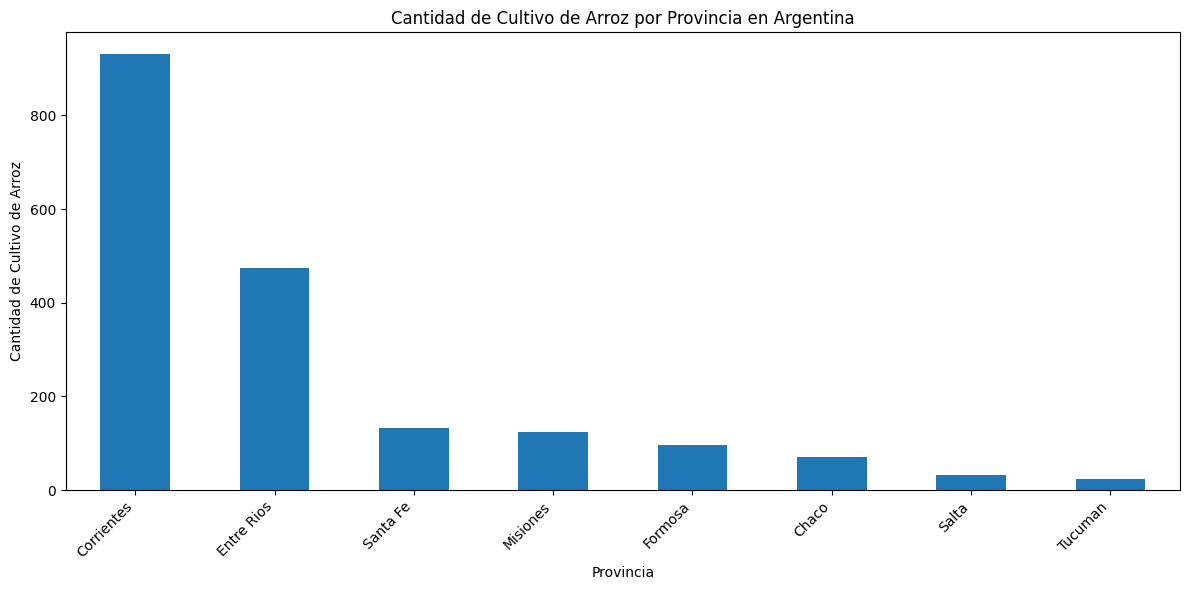

In [28]:
# Agrupa los datos por provincia y cuenta la cantidad de registros (cultivo de arroz) en cada provincia
cultivo_por_provincia = arroz_data1['provincia'].value_counts()

# Crea un gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))

cultivo_por_provincia.plot(kind='bar', ax=ax)

ax.set_xticklabels(cultivo_por_provincia.index, rotation=45, ha='right')

plt.xlabel('Provincia')
plt.ylabel('Cantidad de Cultivo de Arroz')
plt.title('Cantidad de Cultivo de Arroz por Provincia en Argentina')

plt.tight_layout()
plt.show()


In [21]:
# Definir las variables predictoras (features) y la variable objetivo (target)
X = arroz_data[['sup_sembrada', 'sup_cosechada']]
y = arroz_data['rendimiento']

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de arroz_data
model.fit(X, y)

# Pronóstico para futuros valores
new_data = pd.DataFrame({'sup_sembrada': [10000, 15000], 'sup_cosechada': [5000, 7500]})
future_predictions = model.predict(new_data)
print("Pronóstico para nuevas observaciones:")
for i, prediction in enumerate(future_predictions):
    print(f"Cultivo {i+1}: Rendimiento estimado = {prediction}")

Pronóstico para nuevas observaciones:
Cultivo 1: Rendimiento estimado = 2375.438591169273
Cultivo 2: Rendimiento estimado = 1481.701689495003


In [ ]:
# Generar datos ficticios para las nuevas columnas
n_filas = len(arroz_data1)

# Generar datos de temperatura promedio (ejemplo: entre 20 y 35 grados Celsius)
temperatura_promedio = np.random.uniform(20, 35, n_filas)

# Generar datos de precipitación (ejemplo: entre 50 mm y 150 mm)
precipitacion = np.random.uniform(50, 150, n_filas)

# Generar datos de humedad del suelo (ejemplo: entre 10% y 30%)
humedad_suelo = np.random.uniform(10, 30, n_filas)

# Generar datos de fertilizantes (ejemplo: entre 400 kg/ha y 800 kg/ha)
fertilizantes = np.random.uniform(400, 800, n_filas)

# Agregar las nuevas columnas al DataFrame arroz_data
arroz_data1['temperatura_promedio'] = temperatura_promedio
arroz_data1['precipitacion'] = precipitacion
arroz_data1['humedad_suelo'] = humedad_suelo
arroz_data1['fertilizantes'] = fertilizantes


In [24]:
# Definir las variables predictoras (features) y la variable objetivo (target)
X = arroz_data1[['sup_sembrada', 'sup_cosechada', 'temperatura_promedio', 'precipitacion', 'humedad_suelo', 'fertilizantes']]  # Agrega las variables predictoras que desees
y = arroz_data1['rendimiento']

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de arroz_data
model.fit(X, y)

# Pronóstico para futuros valores
new_data = pd.DataFrame({
    'sup_sembrada': [10000, 15000],
    'sup_cosechada': [5000, 7500],
    'temperatura_promedio': [25, 30],
    'precipitacion': [100, 150],
    'humedad_suelo': [20, 25],
    'fertilizantes': [500, 600]
})
future_predictions = model.predict(new_data)
print("Pronóstico para nuevas observaciones:")
for i, prediction in enumerate(future_predictions):
    print(f"Cultivo {i+1}: Rendimiento estimado = {prediction}")


Pronóstico para nuevas observaciones:
Cultivo 1: Rendimiento estimado = 2330.2527349950738
Cultivo 2: Rendimiento estimado = 1586.23508947469
